# Mincurso Python Científico
## Lista 01 - Solução
### Andre Nepomuceno - UFF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

**Questão 1.1**

In [2]:
def blambda(ll,T):
    h = 6.626e-34   #Js
    c = 2.998e8     #m/s
    kb = 1.381e-23  #J/K
    return 2*h*c**2/(ll**5)*1/((np.exp(h*c/(ll*kb*T))-1.0))

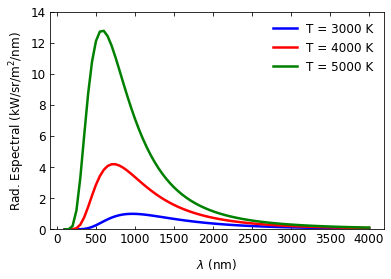

In [3]:
fig, ax = plt.subplots()
ll = np.arange(100,4050,50)
#fatores de conversao (para que B seja dado em kW.m-2nm-1)
fac1 = 1e-9  #nm para m
fac2 = 1e-12 #W/m3 para kW/m2.nm
cores = ['b','r','g']
for i,T in enumerate([3000,4000,5000]):
    label = 'T = '+str(T)+' K'
    ax.plot(ll,fac2*blambda(fac1*ll,T),c=cores[i],lw=2.5,label=label)
ax.set_ylim(0,14)
ax.set_xlabel('$\lambda$ (nm)',fontsize=12,labelpad=11)
ax.set_ylabel('Rad. Espectral (kW/sr/m$^2$/nm)',fontsize=12)
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='both',direction='in',labelsize=12)
ax.legend(frameon=False,fontsize=12)

**Questão 1.2**

Como os arquivos tem tamanhos diferentes e dados perdidos (NaN), vamos utilzar Pandas para importá-los.

In [4]:
data_pib = pd.read_csv('../pcientifico_dados/pib_paises.tsv',delimiter='\t',index_col=0,names=['PIB'])
data_imc = pd.read_csv('../pcientifico_dados/imc_homens.tsv',delimiter='\t',index_col=0,names=['IMC'])
data_pop = pd.read_csv('../pcientifico_dados/populacao_total.tsv',delimiter='\t',index_col=0,names=['Populacao'])
data_cont = pd.read_csv('../pcientifico_dados/continentes.tsv',delimiter='\t',index_col=0,names=['Continente'])
data_pop.head(7)

,Populacao
Abkhazia,NaN
Afghanistan,29145841.0
Akrotiri and Dhekelia,NaN
Albania,3169665.0
Algeria,33906605.0
American Samoa,65130.0
Andorra,81390.0


In [5]:
#Vamos juntar (concatenar) todos os DataFrames, usando o nome dos paises como indices comuns
data_tot = pd.concat([data_pib,data_imc,data_pop,data_cont],axis=1)
data_tot.head(7)

,PIB,IMC,Populacao,Continente
Abkhazia,NaN,NaN,NaN,NaN
Afghanistan,983.652314,20.60246,29145841.0,Asia
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN
Albania,5958.021197,26.32753,3169665.0,Europe
Algeria,6133.782763,24.48846,33906605.0,Africa
American Samoa,13265.961001,NaN,65130.0,Oceania
Andorra,39244.406089,27.53363,81390.0,Europe


In [6]:
#Vamos eliminar qualquer linha que tenha valor invalido (NaN)
data_tot.dropna(inplace=True)
data_tot.head()

,PIB,IMC,Populacao,Continente
Afghanistan,983.652314,20.60246,29145841.0,Asia
Albania,5958.021197,26.32753,3169665.0,Europe
Algeria,6133.782763,24.48846,33906605.0,Africa
Andorra,39244.406089,27.53363,81390.0,Europe
Angola,4950.178553,22.08962,17525367.0,Africa


In [7]:
#Vamos criar um dicionario para associnar cores aos continentes
colormap = {'South America':'yellow','North America':'red','Europe':'green',
            'Asia':'purple','Africa':'blue','Oceania':'darkorange'}

Text(0.5, 0, 'PIB')

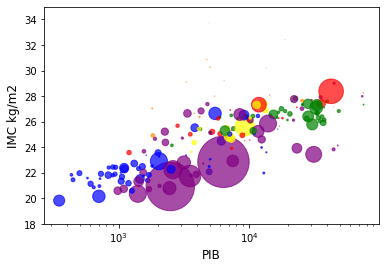

In [8]:
#Agora fazemos o plot
ss = data_tot['Populacao']/1.e9*2000
lista_cores = []
for i in range(data_tot['Continente'].values.size):
    lista_cores.append( colormap[data_tot['Continente'].values[i]] )
data_tot.plot(kind='scatter', x ='PIB',y='IMC',s=ss,c=lista_cores,alpha=0.7)
plt.xscale('log')
plt.ylim(18,35)
plt.ylabel('IMC kg/m2',fontsize=12)
plt.xlabel('PIB',fontsize=12)

**Questão 1.3**

In [9]:
#importe arquivo
data = np.loadtxt('../pcientifico_dados/fontes_energia_alemanha.txt',skiprows=2)
data[:3]

array([[  2018.,  17974., 109951.,  50851.,  45784.],
       [  2017.,  20150., 105693.,  50917.,  39401.],
       [  2016.,  20546.,  79924.,  50928.,  38098.]])

In [10]:
ano = data[:,0]
print(data.shape)
N = ano.size
print(N)

(29, 5)
29


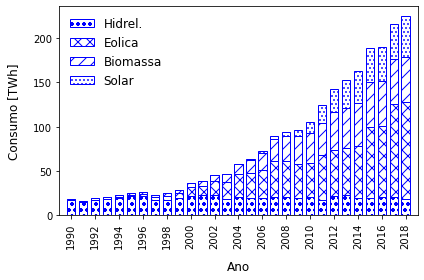

In [11]:
fontes = ['Hidrel.','Eolica','Biomassa','Solar']
hatch = ['oo', 'xx', '//', '...']
base = np.zeros(N)
barra = []  #lista vazia
#criar o grafico
fig = plt.figure()
ax = fig.add_subplot()
for i in range(1,5):
    barra.append(ax.bar(ano,height=data[:,i]/1000,bottom=base,width=0.7, hatch=hatch[i-1],
                        color='w',edgecolor='b'))
    base = base + data[:,i]/1000
ax.set_xlim(1989,2019)
ax.set_xlabel('Ano',fontsize=12,labelpad=12)
ax.set_ylabel('Consumo [TWh]',fontsize=12,labelpad=13)
ax.set_xticks(ano[::2]) #labels a cada dois anos
plt.xticks(rotation=90)
ax.legend(barra, fontes,frameon=False,fontsize=12, loc='best')
plt.tight_layout()

**Questão 1.4**

In [12]:
theta = np.linspace(0,24*np.pi,1000)
r = np.exp(np.sin(theta)) - 2*np.cos(4*theta) + np.sin((2*theta-np.pi)/24)**5

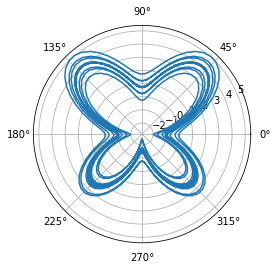

In [13]:
plt.polar(theta,r)

**Questão 1.5**

Vamos escolhar um sistema de cordenadas onde (x,y) = (0,0) está no centro do quadrado de 1m2 de área.

In [14]:
#funcão para calcular o r (assumindo y1 = y2 = 0)
def rfunc(x,y,x0):
    return np.sqrt((x-x0)**2 + y**2)

In [15]:
l_lambda = 0.05  #m
psi0 = 0.01  #m
k = 2*np.pi/l_lambda
x1 = -0.1  #m, y1 = 0
x2 =  0.1  #m, y2 = 0
x = np.linspace(-0.5,0.5,200)
y = np.linspace(-0.5,0.5,200)
X,Y = np.meshgrid(x,y)

In [16]:
psi = psi0*np.sin(k*rfunc(X,Y,x1)) + psi0*np.sin(k*rfunc(X,Y,x2))

[]

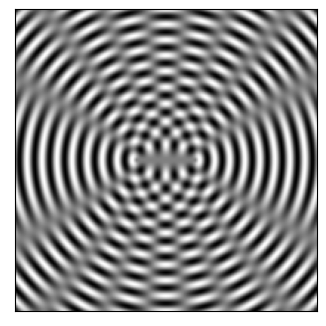

In [17]:
#Plot a imagem
fig,ax1 = plt.subplots(dpi=100)
ax1.imshow(psi,cmap='gray')
ax1.set_xticks([])
ax1.set_yticks([])

**Questão 1.6** (conjunto de Mandelbrot)

(-1.1, 1.1)

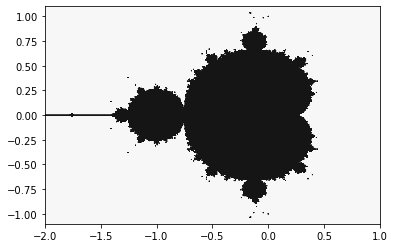

In [18]:
N = 1000
#Vamos usar np.fromfunction para produzir uma matriz de valores x,y entre -2 e 2
c = np.fromfunction(lambda x,y: (4*(x-N)/N + 2) + (4*(y-N)/N + 2)*1j,(N+1,N+1))
c2 = c.flatten()
nz = c2.size
Z = np.ones(nz)
for i in range(nz):
    z = 0j
    for k in range(100):
        z = z**2 + c2[i]
        if np.abs(z) > 2.: 
            Z[i] = 0
            break
Z = Z.reshape(N+1,N+1)
#Z.sum()
X = c.real
Y = c.imag
plt.contourf(X,Y,Z,cmap = 'Greys')
plt.xlim(-2,1)
plt.ylim(-1.1,1.1)

**Questão 1.7**

0


Text(0, 0.5, 'Img')

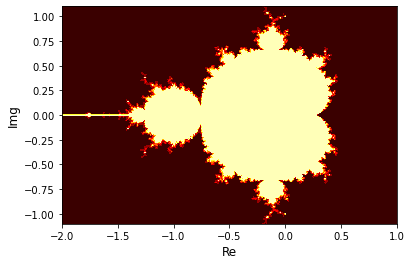

In [19]:
N = 1000
nmax = 100
#Vamos usar np.fromfunction para produzir uma matriz de valores x,y entre -2 e 2
c = np.fromfunction(lambda x,y: (4*(x-N)/N + 2) + (4*(y-N)/N + 2)*1j,(N+1,N+1))
c2 = c.flatten()
nz = c2.size
Z = nmax*np.ones(nz)
for i in range(nz):
    z = 0j
    for k in range(nmax):
        z = z**2 + c2[i]
        if np.abs(z) > 2.: 
            Z[i] = k 
            break
print(k)
Z = Z.reshape(N+1,N+1)
X = c.real
Y = c.imag
plt.contourf(X,Y,Z,cmap = 'hot')
plt.xlim(-2,1)
plt.ylim(-1.1,1.1)
plt.xlabel('Re',fontsize=12)
plt.ylabel('Img',fontsize=12)